<a href="https://colab.research.google.com/github/Tanjul5/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import inportant library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Problem Statment
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors

Data Description

Demographic: • Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

In [4]:
df.shape

(3390, 17)

In [5]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [8]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


DATA CLEANING

THE FOLLOWING CHANGES ARE TO BE MADE BEFORE USING THE DATA

1.the id column doesn't affect the output so we can remove them.

In [9]:
df1=df.drop(columns=['id'],inplace = True)

In [10]:
df.shape

(3390, 16)

In [11]:
#check null values
df.isnull().mean() *100

age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [12]:
# categorical variale convert into dummy variale by One Hot Encoding
df1 = pd.get_dummies(df,columns=['sex','is_smoking'],drop_first=True)
df1

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,0,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,0,0
3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,0,0
3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,1,1
3388,60,1.0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,1,0


In [13]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Now we have 2 dummy variable columns. In the “Sex_M” column, 1 indicates that the passenger is male and 0 is female. The “Sex_F” column is dropped since the “drop_first” parameter is set as True. Similarly, there are only 1 columns for “is_smoking_YES” because the second one has been dropped.

In [14]:
#treating missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

In [15]:
#now check all the missing values is fill or not
df1.isna().any()

age                False
education          False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
sex_M              False
is_smoking_YES     False
dtype: bool

In [16]:
#check duplicate value

len(df[df.duplicated()])

0

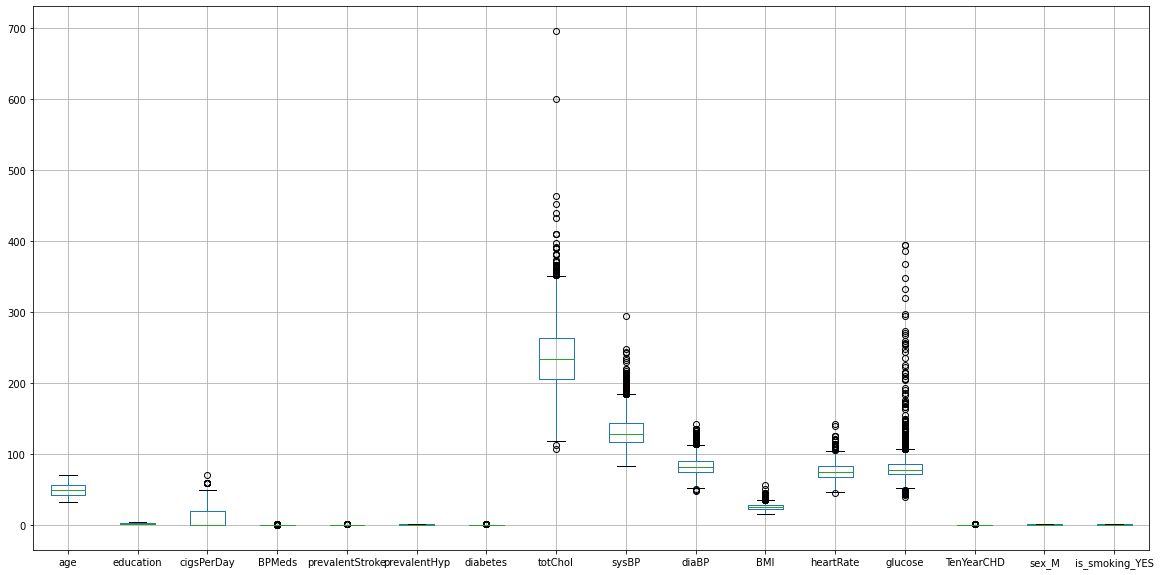

In [17]:
#check outliers
plt.figure(figsize=(20,10))
df1.boxplot()

Six columns have outiers we will create another variable for this.

In [18]:
#extract outlier columns
outlier = df1[['totChol','sysBP','diaBP','BMI','heartRate','glucose']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

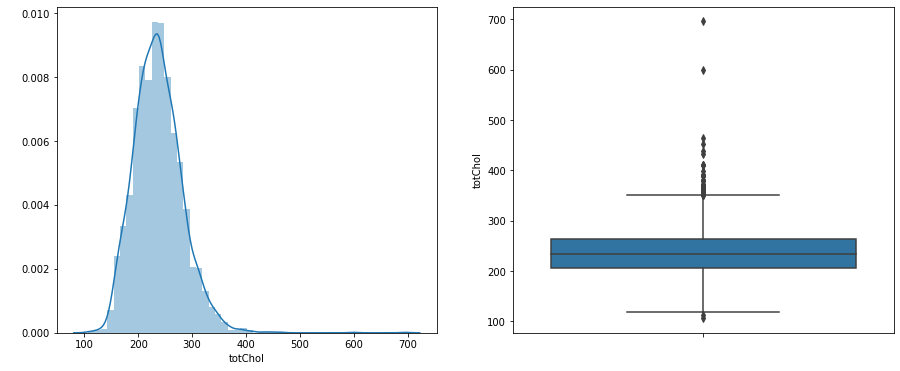

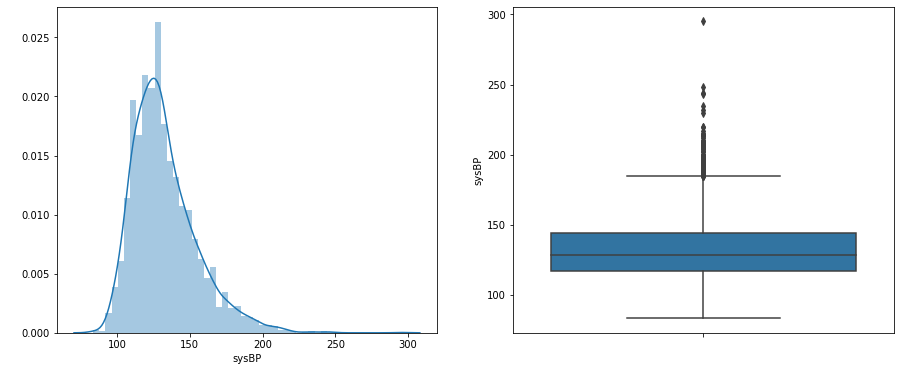

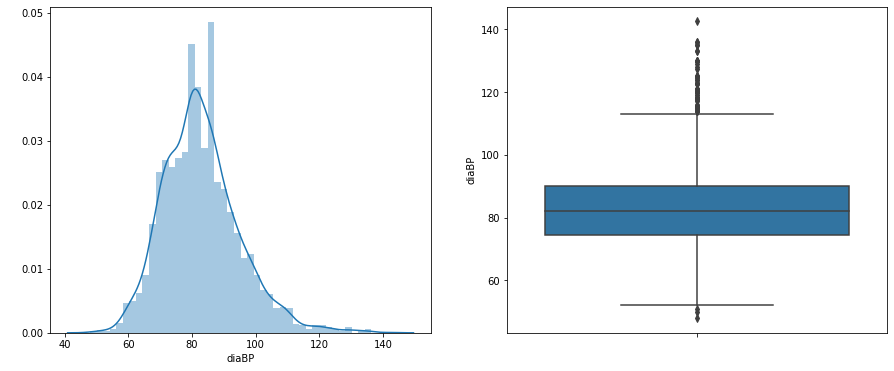

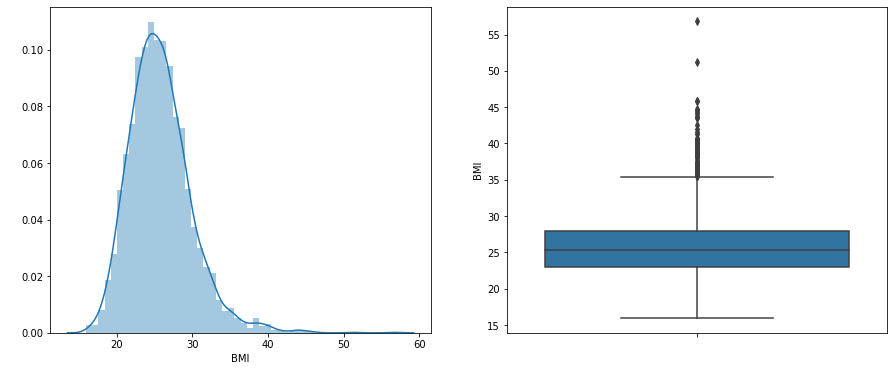

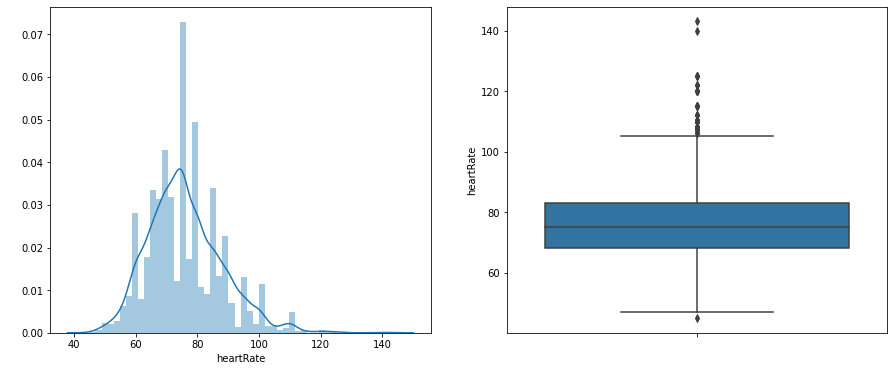

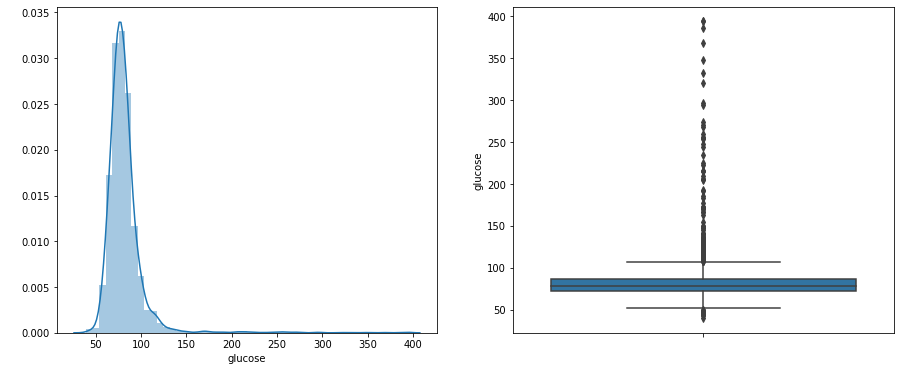

In [19]:
#plots for independent variables
for var in outlier:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna())
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df1[var])
    fig.set_title('')
    fig.set_ylabel(var)

**Outlier Identification**

One method of finding outliers is the box plot. It is a very simple and effective way to visualize outliers. The box plot is based on a summary of five numbers: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. The lower and upper ranges are the boundaries of the data distribution. Any data points that show above or below the ranges can be considered outliers or anomalies.

Glucose column has many outlier after that totChol.


In [20]:
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)

In [21]:
print (Q1)
print (Q3)

totChol      206.00
sysBP        117.00
diaBP         74.50
BMI           23.03
heartRate     68.00
glucose       72.00
Name: 0.25, dtype: float64
totChol      264.0000
sysBP        144.0000
diaBP         90.0000
BMI           27.9975
heartRate     83.0000
glucose       86.0000
Name: 0.75, dtype: float64


In [22]:
IQR = Q3 - Q1
print(IQR)

totChol      58.0000
sysBP        27.0000
diaBP        15.5000
BMI           4.9675
heartRate    15.0000
glucose      14.0000
dtype: float64


In [23]:
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

In [24]:
lower_range

totChol      119.00000
sysBP         76.50000
diaBP         51.25000
BMI           15.57875
heartRate     45.50000
glucose       51.00000
dtype: float64

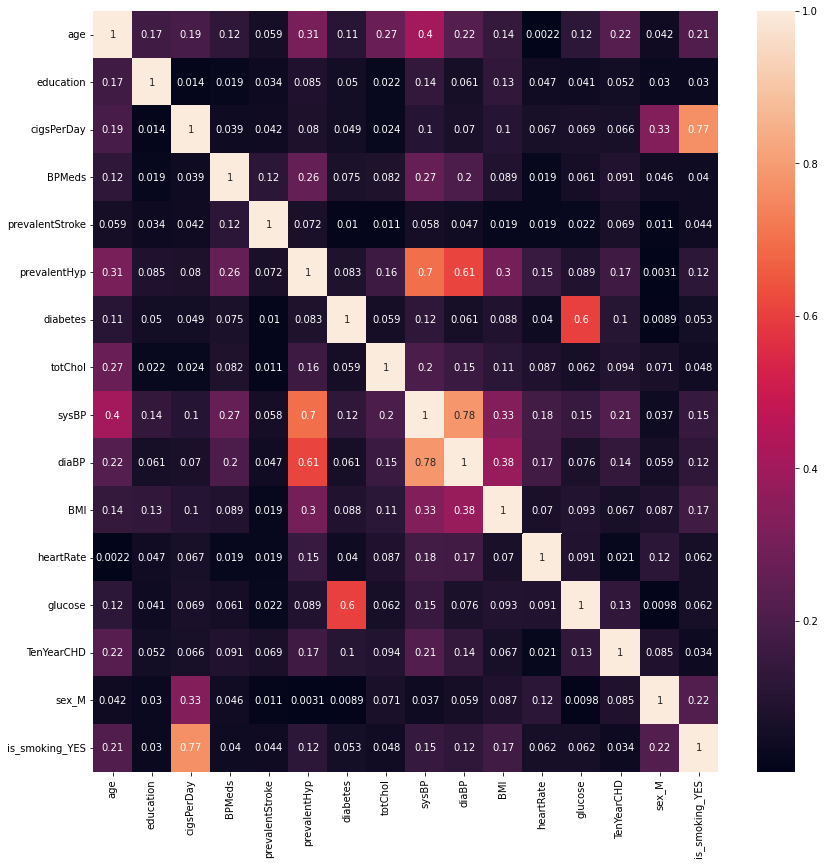

In [25]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True)

In [26]:
#create independent and dependent variable
indep_var = df1.drop(columns=['TenYearCHD'])

dep_var = df1[('TenYearCHD')]

**UNIVARIATE ANALYSIS**

In [27]:
indep_var

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_M,is_smoking_YES
0,64.0,2.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,27.62,90.0,80.0,0.0,1.0
1,36.0,4.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,1.0,0.0
2,46.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0,1.0
3,50.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0,1.0
4,64.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60.0,1.0,0.0,0.0,0.0,0.0,0.0,261.0,123.5,79.0,29.28,70.0,103.0,0.0,0.0
3386,46.0,1.0,0.0,0.0,0.0,0.0,0.0,199.0,102.0,56.0,21.96,80.0,84.0,0.0,0.0
3387,44.0,3.0,3.0,0.0,0.0,1.0,0.0,352.0,164.0,119.0,28.92,73.0,72.0,1.0,1.0
3388,60.0,1.0,0.0,0.0,0.0,1.0,0.0,191.0,167.0,105.0,23.01,80.0,85.0,1.0,0.0


In [28]:
#create continous and discrete column 
continous_columns_list = ['age','cigsPerDay', 'totChol','sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
discrete_columns_list = ['education','sex_M','is_smoking_YES','BPMeds','prevalentStroke','prevalentHyp','diabetes']

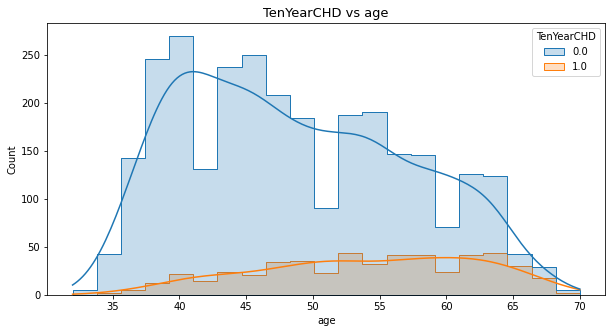

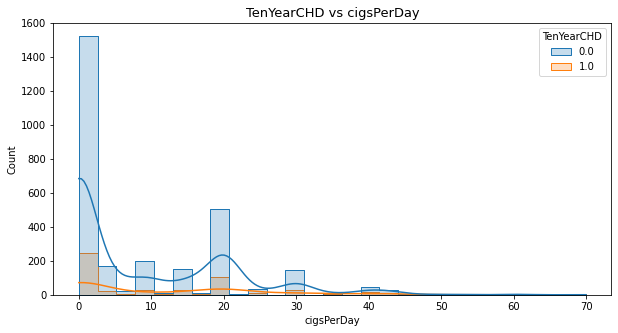

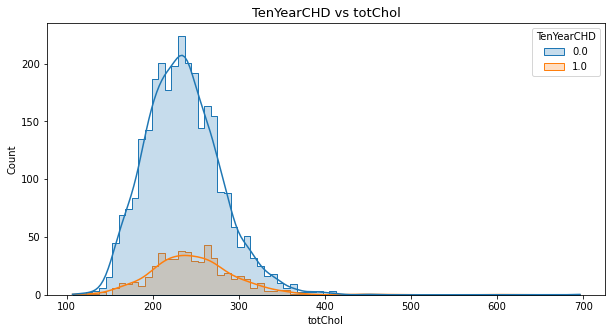

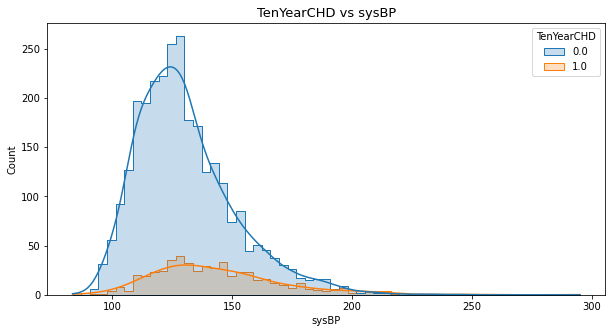

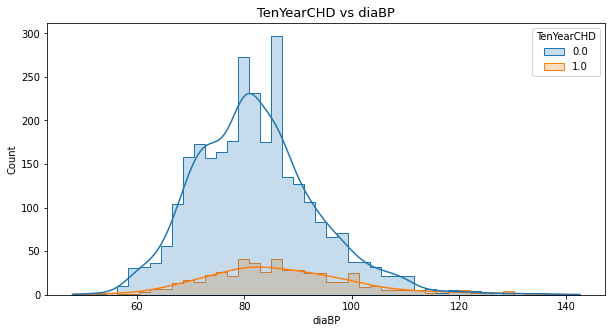

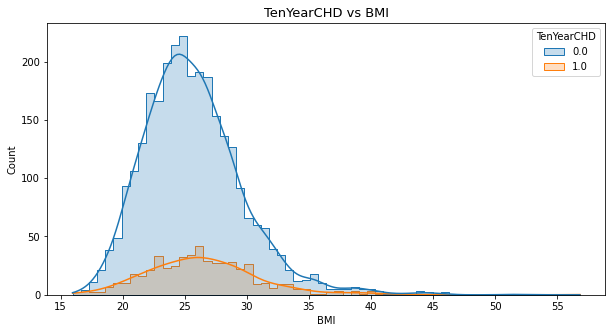

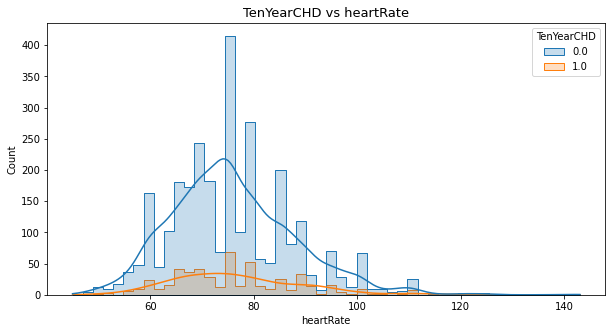

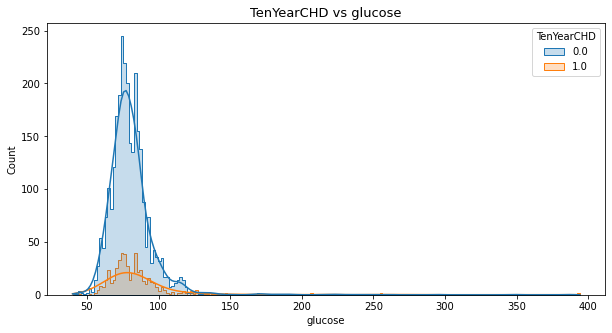

In [29]:
for i, col in enumerate(continous_columns_list):
    fig, ax = plt.subplots(figsize = (10,5))
    sns.histplot(data=df1, x=col, hue="TenYearCHD",element="step", kde=True, ax=ax) 
    plt.title(f'TenYearCHD vs {col}', fontsize=13)
    plt.show()


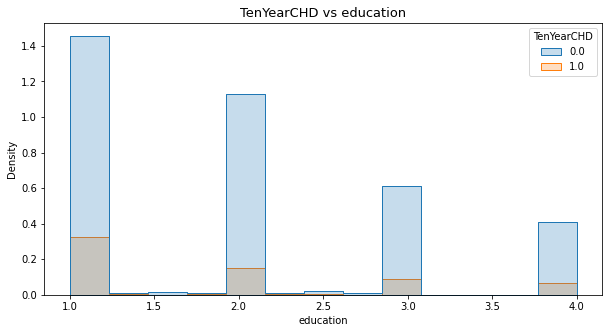

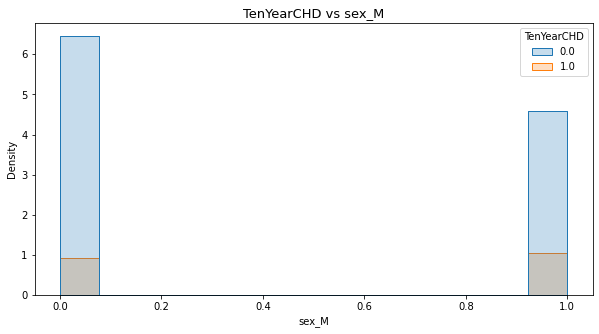

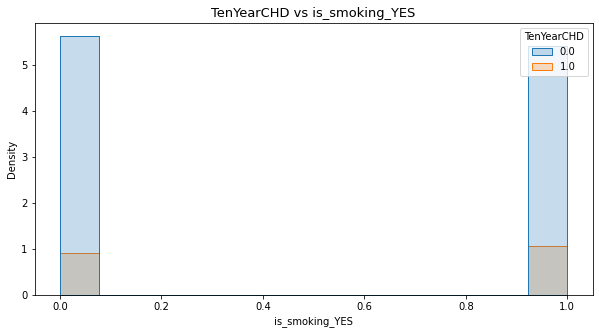

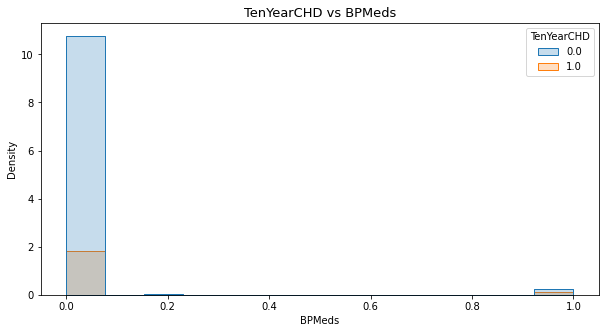

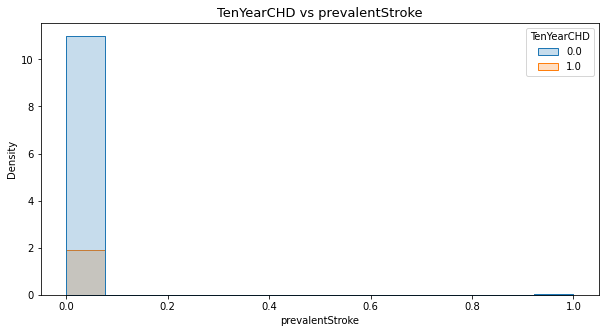

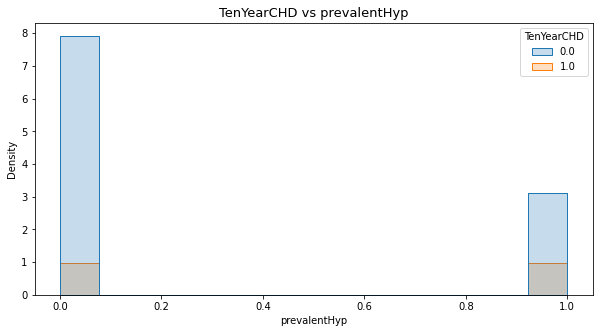

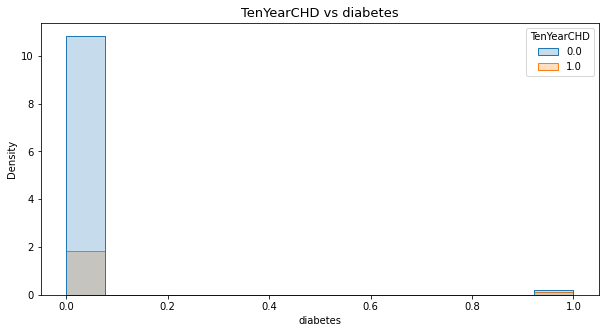

In [30]:
for i, col in enumerate(discrete_columns_list):
    fig, ax = plt.subplots(figsize = (10,5))
   # ax = plt.subplot(4,4,(i+1))
    sns.histplot(data=df1, x=col, hue="TenYearCHD", element="step",stat="density", ax=ax) 
    plt.title(f'TenYearCHD vs {col}', fontsize=13)
    plt.show()

**DEPENDENT VARIABLE**

Text(0.5, 1.0, 'heart_attack risk')

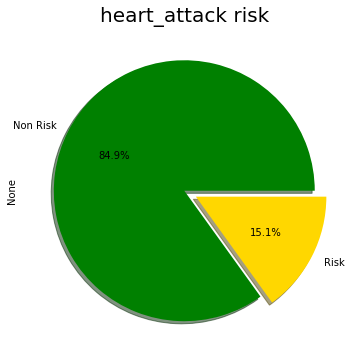

In [31]:
#check how many people are in risk of heart attack
heart_attack=df1.groupby('TenYearCHD').size().plot(kind='pie',labels = ['Non Risk',"Risk"], autopct='%.1f%%', shadow=True, explode = (0,0.1),
 figsize=(6, 6), colors = [ 'green', 'gold'],textprops={'color':"black"}) 
plt.title('heart_attack risk',fontsize=20)

In [32]:
df1['TenYearCHD'].value_counts()

0.0    2879
1.0     511
Name: TenYearCHD, dtype: int64


Since our data is quite imbalanced we will run SMOTE to balance it.

In [33]:
# Let us now split
X = df1.drop(['TenYearCHD'], axis=1)
y = df1['TenYearCHD']

In [34]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [35]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df1))
print('Resampled dataset shape', len(y_smote))


print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))

Original dataset shape 3390
Resampled dataset shape 5758
Before OverSampling, counts of label '1': 409
Before OverSampling, counts of label '0': 2303 

After OverSampling, counts of label '1': 2879
After OverSampling, counts of label '0': 2879


In [36]:
df_new = pd.concat([X_smote,y_smote], axis=1)

In [37]:
df_new

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_M,is_smoking_YES,TenYearCHD
0,64.000000,2.000000,3.000000,0.0,0.0,0.000000,0.0,221.000000,148.000000,85.000000,27.620000,90.000000,80.000000,0.000000,1.000000,1.0
1,36.000000,4.000000,0.000000,0.0,0.0,1.000000,0.0,212.000000,168.000000,98.000000,29.770000,72.000000,75.000000,1.000000,0.000000,0.0
2,46.000000,1.000000,10.000000,0.0,0.0,0.000000,0.0,250.000000,116.000000,71.000000,20.350000,88.000000,94.000000,0.000000,1.000000,0.0
3,50.000000,1.000000,20.000000,0.0,0.0,1.000000,0.0,233.000000,158.000000,88.000000,28.260000,68.000000,94.000000,1.000000,1.000000,1.0
4,64.000000,1.000000,30.000000,0.0,0.0,0.000000,0.0,241.000000,136.500000,85.000000,26.420000,70.000000,77.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,59.891730,2.000000,4.433082,0.0,0.0,1.000000,0.0,275.659849,207.340151,117.118497,25.056803,86.226767,86.103157,0.221654,0.221654,1.0
5754,55.740518,1.000000,14.810363,0.0,0.0,1.000000,0.0,214.664663,197.405182,122.594818,39.701436,73.708600,75.632746,0.740518,0.740518,1.0
5755,62.357145,1.000000,0.000000,0.0,0.0,1.000000,0.0,359.071436,173.535689,101.071424,29.234278,82.857151,101.285721,0.000000,0.000000,1.0
5756,39.526313,3.583733,14.167466,0.0,0.0,0.000000,0.0,246.196176,109.861244,62.248801,23.070525,83.473687,57.497603,0.861244,1.000000,1.0


In [38]:
X_new = df_new.drop(['TenYearCHD'], axis=1)
y_new = df_new.iloc[:,-1]

In [39]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X_new,y_new,test_size=0.2,random_state=2,stratify=y_new)

In [40]:
#standardize the variables before feeding to the algorithms
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

scaled_train_X = scaler.fit_transform(X_train_n)
X_train = pd.DataFrame(scaled_train_X)

scaled_test_X = scaler.transform(X_test_n)
X_test = pd.DataFrame(scaled_test_X)

7 Types of Classification Algorithms

Logistic Regression

Naïve Bayes

Stochastic Gradient Descent

K-Nearest Neighbours

Decision Tree

Random Forest

Support Vector Machine

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_trf = pca.fit_transform(X_train_n)
X_test_trf = pca.transform(X_test_n)
print("original shape:   ",X_train_trf )
print("transformed shape:", X_test_trf.shape)

original shape:    [[-1.02082302e+01 -9.29486111e+00 -2.50385134e+00 ... -5.91038060e+00
  -2.44593484e-01 -3.11892578e-01]
 [-1.62224454e+01  1.05437298e+01 -1.86446905e+01 ...  8.82902311e-01
  -8.13050650e-01  4.66542606e-01]
 [ 1.25143168e+02  1.37827000e+01 -1.78021992e+01 ...  1.00505927e+00
  -8.11379007e-01 -2.30316057e-01]
 ...
 [-5.03178243e+00  5.84676831e+00 -7.39271432e+00 ...  2.65417258e+00
  -8.84959773e-01 -3.89508298e-01]
 [-1.57649152e+00  4.58544641e+01 -5.28665292e+01 ...  2.18496876e+01
   6.39171217e-02 -7.45014771e-01]
 [-2.12331074e+01 -1.07386794e+01  4.14039666e+00 ... -4.45894971e-01
  -1.85268139e-02  3.64789255e-01]]
transformed shape: (1152, 10)


# **LOGISTIC REGRESSION**

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_trf,y_train_n)
y_pred = lr.predict(X_test_trf)
print(accuracy_score(y_test_n,y_pred))

0.6475694444444444


In [44]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score,\
 accuracy_score, roc_curve, auc, classification_report, confusion_matrix

 
print(confusion_matrix(y_pred,y_test_n  ))

[[357 187]
 [219 389]]


**HYPERPARAMETER TUNNING**

In [45]:
# Use gridsearch to search optimal parameters
parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
          'C':[100, 10, 1.0, 0.1, 0.01],
          'penalty':['l1','l2','elasticnet'],
          'class_weight':['balanced',None]}
log_classifier = GridSearchCV(LogisticRegression(),param_grid=parameters,cv=5)

grid_result = log_classifier.fit(X_train_trf, y_train_n)
lr_predictions= log_classifier.predict(X_test_trf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

In [46]:
grid_result.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}

In [47]:
lr_accuracy= accuracy_score(lr_predictions,y_test_n)

In [48]:
#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test_n)
lr_precision= precision_score(lr_predictions,y_test_n)
lr_recall= recall_score(lr_predictions,y_test_n)
lr_f1_score= f1_score(lr_predictions, y_test_n)


print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Decision Tree Classifier after hyperparameter tuning
Accuracy : 0.6397569444444444
Precision : 0.6701388888888888
Recall : 0.6317512274959084
F1 Score : 0.6503791069924179


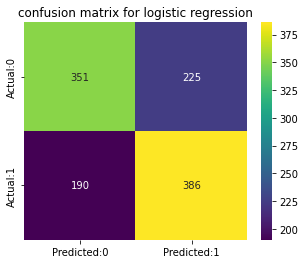

In [49]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test_n,lr_predictions)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for logistic regression')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

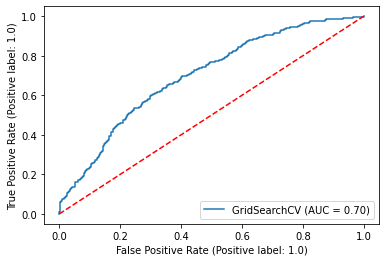

In [50]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(log_classifier,X_test_trf,y_test_n)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

# **SVM**

In [51]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train_trf,y_train_n)
svm_predictions= svm.predict(X_test_trf)

#Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test_n)
svm_accuracy

0.6649305555555556

In [52]:
#plot the confusion matrix
print(confusion_matrix(y_test_n,svm_predictions))

[[353 223]
 [163 413]]


HYPERPARAMETER TUNNING

In [53]:
# running grid search for optimal parameters
param_grid = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf','sigmoid'],
              'probability':[True]}
 
svm_classifier = GridSearchCV(SVC(), param_grid,cv=2)
 
# fitting the model
svm_classifier.fit(X_train_trf, y_train_n)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid'], 'probability': [True]})

In [54]:
# print best parameter after tuning
print(svm_classifier.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}


In [55]:
y_svm_pred = svm_classifier.predict(X_test_trf)

In [56]:
#Performance Metrics
SVM_accuracy= accuracy_score(y_svm_pred,y_test_n)
SVM_precision= precision_score(y_svm_pred,y_test_n, average='weighted')
SVM_recall= recall_score(y_svm_pred,y_test_n, average='weighted')
SVM_f1_score= f1_score(y_svm_pred, y_test_n, average='weighted')

print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , SVM_accuracy)
print('Precision :', SVM_precision)
print('Recall :', SVM_recall)
print('F1 Score :', SVM_f1_score)

Performance of Decision Tree Classifier after hyperparameter tuning
Accuracy : 0.9435763888888888
Precision : 0.9435778959297841
Recall : 0.9435763888888888
F1 Score : 0.9435764314052657


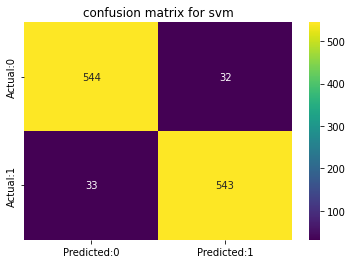

In [57]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test_n,y_svm_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for svm')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

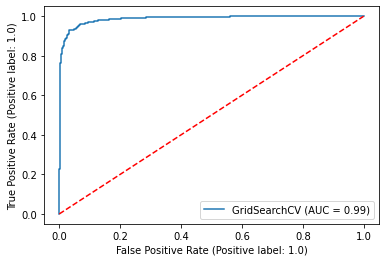

In [58]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(svm_classifier,X_test_trf,y_test_n)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

# **NAIVE BYES CLASSIFIER**

In [59]:
from sklearn.naive_bayes import GaussianNB
naive_clf= GaussianNB().fit(X_train_trf,y_train_n)
y_nbc_pred = naive_clf.predict(X_test_trf)
nbc_accuracy= accuracy_score(y_nbc_pred,y_test_n)
nbc_accuracy

0.6145833333333334

In [60]:
#plot the confusion matrix
print(confusion_matrix(y_test_n,y_nbc_pred))

[[451 125]
 [319 257]]


**HYPERPARAMETER TUNNING**

In [61]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = GaussianNB()
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

In [62]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test_trf)

gs_NB.fit(Data_transformed, y_test_n);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [63]:
gs_NB.best_params_

{'var_smoothing': 0.02310129700083159}

In [64]:
nb_pred=gs_NB.predict(X_test_trf)

In [65]:
#Performance Metrics
NB_accuracy= accuracy_score(nb_pred,y_test_n)
NB_precision= precision_score(nb_pred,y_test_n, average='weighted')
NB_recall= recall_score(nb_pred,y_test_n, average='weighted')
NB_f1_score= f1_score(nb_pred, y_test_n, average='weighted')

print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , NB_accuracy)
print('Precision :', NB_precision)
print('Recall :', NB_recall)
print('F1 Score :', NB_f1_score)

Performance of Decision Tree Classifier after hyperparameter tuning
Accuracy : 0.5147569444444444
Precision : 0.9301350911458335
Recall : 0.5147569444444443
F1 Score : 0.6419540802764487


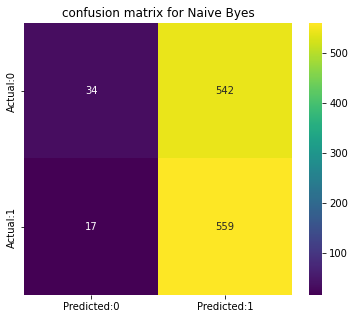

In [66]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test_n,nb_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Naive Byes')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

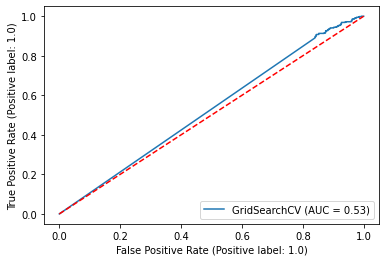

In [67]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(gs_NB,X_test_trf,y_test_n)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

# **Random Forest Classifier**

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train_trf,y_train_n)
y_rf_pred = rf.predict(X_test_trf)
rf_accuracy= accuracy_score(y_rf_pred,y_test_n)
rf_accuracy

0.8862847222222222

**Hyperparameter tunning by RandomizedSearchCV**



*First we do randomizedsearchcv for narrow down the result by checking every random combination.*

In [69]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [70]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_trf,y_train_n)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [71]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 890,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [72]:
best_random_grid=rf_randomcv.best_estimator_

## **Random Forest Classifier BY GRIDSEARCHCV**

we apply gridsearchcv for naarow down features which was created by randomizedseachcv.

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [890], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [400, 500, 600, 700, 800]}


In [74]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train_trf,y_train_n)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [890],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [75]:
best_grid=grid_search.best_estimator_

In [76]:
y_pred_grid=best_grid.predict(X_test_trf)
print(confusion_matrix(y_test_n,y_pred_grid))

[[494  82]
 [ 45 531]]


In [77]:
#Performance Metrics
RF_accuracy= accuracy_score(y_pred_grid,y_test_n)
RF_precision= precision_score(y_pred_grid,y_test_n, average='weighted')
RF_recall= recall_score(y_pred_grid,y_test_n, average='weighted')
RF_f1_score= f1_score(y_pred_grid, y_test_n, average='weighted')

print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , RF_accuracy)
print('Precision :', RF_precision)
print('Recall :', RF_recall)
print('F1 Score :', RF_f1_score)

Performance of Decision Tree Classifier after hyperparameter tuning
Accuracy : 0.8897569444444444
Precision : 0.8918200834297839
Recall : 0.8897569444444444
F1 Score : 0.8898707852520383


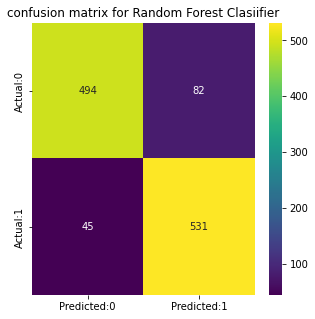

In [78]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test_n,y_pred_grid)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Random Forest Clasiifier')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

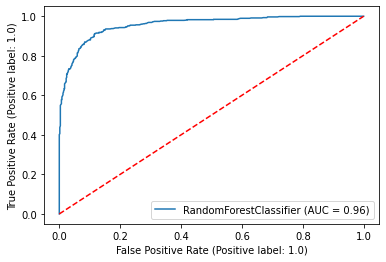

In [79]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(best_grid,X_test_trf,y_test_n)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

# **DECISION TREE**

In [81]:
dt = DecisionTreeClassifier().fit(X_train_trf,y_train_n)
y_dt_pred = dt.predict(X_test_trf)
dt_accuracy= accuracy_score(y_dt_pred,y_test_n)
dt_accuracy

0.7769097222222222

In [82]:
print(confusion_matrix(y_dt_pred,y_test_n))

[[436 117]
 [140 459]]


## **HYPERPARAMETER TUNNING**

In [83]:
# Creating a dictionary of all the parameter options 
parameters = {'criterion': ['gini', 'entropy'],
                  'max_depth': range(1,10),
                 # 'min_samples_split': range(1,10),
              #'min_samples_leaf': range(1,5),
              #'random_state': '0'
              'max_features': range(1,11)
              }

dTree_model=DecisionTreeClassifier()

# Creating a grid search object
grid_search_dTree = GridSearchCV(estimator=dTree_model, param_grid=parameters, n_jobs=-1, cv=10, verbose=3)

# Fitting the grid search
grid_search_dTree.fit(X_train_trf, y_train_n)

dTree_predictions= grid_search_dTree.predict(X_test_trf)

#Performance Metrics
dTree_accuracy= accuracy_score(dTree_predictions,y_test_n)
dTree_precision= precision_score(dTree_predictions,y_test_n, average='weighted')
dTree_recall= recall_score(dTree_predictions,y_test_n, average='weighted')
dTree_f1_score= f1_score(dTree_predictions, y_test_n, average='weighted')

print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , dTree_accuracy)
print('Precision :', dTree_precision)
print('Recall :', dTree_recall)
print('F1 Score :', dTree_f1_score)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Performance of Decision Tree Classifier after hyperparameter tuning
Accuracy : 0.7109375
Precision : 0.7111921899112654
Recall : 0.7109375
F1 Score : 0.7109743153394853


In [84]:
grid_search_dTree.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 10}

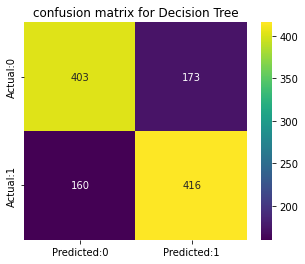

In [85]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test_n,dTree_predictions)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Decision Tree')
plt.show()

In [ ]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_dTree,X_test_trf,y_test_n)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

# **KNN Classifier**

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier().fit(X_train_trf,y_train_n)
knn_pred= knn.predict(X_test_trf)




#Performance Metrics
knn1_accuracy= accuracy_score(knn_pred,y_test_n)
knn1_precision= precision_score(knn_pred,y_test_n, average='weighted')
knn1_recall= recall_score(knn_pred,y_test_n, average='weighted')
knn1_f1_score= f1_score(knn_pred, y_test_n, average='weighted')


print('Accuracy :' , knn1_accuracy)
print('Precision :', knn1_precision)
print('Recall :', knn1_recall)
print('F1 Score :', knn1_f1_score)


Accuracy : 0.8107638888888888
Precision : 0.8651680652006173
Recall : 0.8107638888888888
F1 Score : 0.8160554477152837


In [87]:
#plot the confusion matrix
print(confusion_matrix(y_test_n,knn_pred))

[[372 204]
 [ 14 562]]


**HYPERPARAMETER TUNNING**

In [88]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],'leaf_size' :[1,5,10,15,20,25,30],'p':[1,2]}

In [89]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)

In [90]:
g_res = gs.fit(X_train_trf, y_train_n)

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


In [91]:
y_knn_pred= gs.predict(X_test_trf)

In [92]:
g_res.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [93]:
#Performance Metrics
knn_accuracy= accuracy_score(y_knn_pred,y_test_n)
knn_precision= precision_score(y_knn_pred,y_test_n)
knn_recall= recall_score(y_knn_pred,y_test_n)
knn_f1_score= f1_score(y_knn_pred, y_test_n)

print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of Decision Tree Classifier after hyperparameter tuning
Accuracy : 0.8194444444444444
Precision : 0.9913194444444444
Recall : 0.7377260981912145
F1 Score : 0.845925925925926


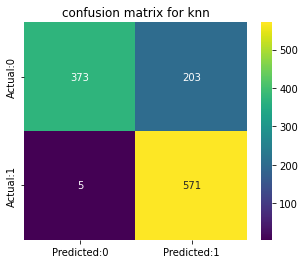

In [94]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test_n,y_knn_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for knn')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

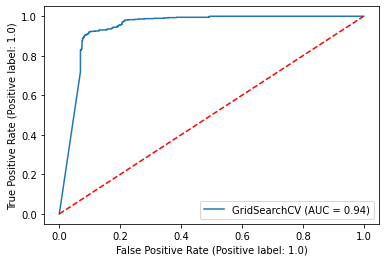

In [95]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(gs,X_test_trf,y_test_n)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

# **SGD**

In [96]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier().fit(X_train_trf,y_train_n)
y_sgd_pred = sgd.predict(X_test_trf)
sgd_accuracy= accuracy_score(y_sgd_pred,y_test_n)
sgd_accuracy

0.5928819444444444

In [97]:
#Performance Metrics
sgd_accuracy= accuracy_score(y_sgd_pred,y_test_n)
sgd_precision= precision_score(y_sgd_pred,y_test_n)
sgd_recall= recall_score(y_sgd_pred,y_test_n)
sgd_f1_score= f1_score(y_sgd_pred, y_test_n)



print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , sgd_accuracy)
print('Precision :', sgd_precision)
print('Recall :', sgd_recall)
print('F1 Score :', sgd_f1_score)

Performance of Decision Tree Classifier after hyperparameter tuning
Accuracy : 0.5928819444444444
Precision : 0.4913194444444444
Recall : 0.616557734204793
F1 Score : 0.5468599033816425


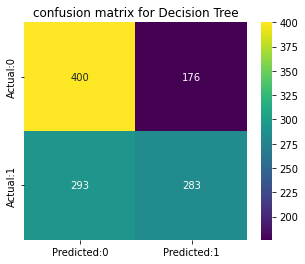

In [98]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test_n,y_sgd_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Decision Tree')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

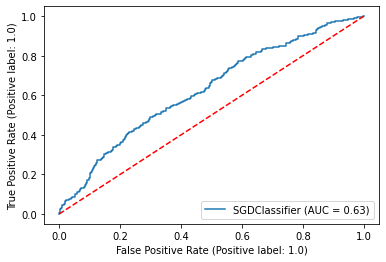

In [99]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(sgd,X_test_trf,y_test_n)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

# **MODEL COMPARISION**

In [102]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':lr_accuracy,  'F1 score':lr_f1_score,'Precision': lr_precision, 'Recall':lr_recall},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'F1 score':knn_f1_score, 'Precision': knn_precision, 'Recall':knn_recall },
    "Decision trees":{'Accuracy':dTree_accuracy,  'F1 score':dTree_f1_score,'Precision': dTree_precision, 'Recall':dTree_recall},
    "Support vector machine":{'Accuracy':SVM_accuracy,  'F1 score':SVM_f1_score,'Precision': SVM_precision, 'Recall':SVM_recall},
    "SGDClassifier" :{'Accuracy':sgd_accuracy,  'F1 score':sgd_f1_score,'Precision': sgd_precision, 'Recall':sgd_recall},
    "RandomForestclassifier" :{'Accuracy':RF_accuracy,  'F1 score':RF_f1_score,'Precision': RF_precision, 'Recall':RF_recall},
    "NaiveByes" :{'Accuracy':NB_accuracy,  'F1 score':NB_f1_score,'Precision': NB_precision, 'Recall':NB_recall}})

In [103]:
comparison

,Logistic regression,K-nearest neighbours,Decision trees,Support vector machine,SGDClassifier,RandomForestclassifier,NaiveByes
Accuracy,0.639757,0.819444,0.710938,0.943576,0.592882,0.889757,0.514757
F1 score,0.650379,0.845926,0.710974,0.943576,0.546860,0.889871,0.641954
Precision,0.670139,0.991319,0.711192,0.943578,0.491319,0.891820,0.930135
Recall,0.631751,0.737726,0.710938,0.943576,0.616558,0.889757,0.514757
